In [1]:
import psycopg2
import pandas as pd

In [2]:
try:
    conn = psycopg2.connect(
    dbname="hd64m1ki",
    user="sy91dhb",
    password="g5t49ao",
    host="178.156.142.230",
    port=5432
    )
except Exception as e:
    print(e)

cur = conn.cursor()

try:
    cur.execute("""
    SELECT column_name
    FROM information_schema.columns
    WHERE table_name = 'items_by_year'
    AND table_schema = 'hacker_news'
    ;
    """)
    columns = cur.fetchall()
   
    cur.execute("""
    SELECT *
    FROM hacker_news.items_by_year_2024
    LIMIT 10000;
    """)
    rows = cur.fetchall()
    print("Hacker News Row Ex:", rows[0])
    print("length: ", len(rows))

except Exception as e:
    print(e)

#cleaning up column names by removing "("   ","   ")"
for (idx, col) in enumerate(columns):
    col = ''.join([char for char in col if char.isalnum()])
    columns[idx] = col

df = pd.DataFrame(columns=[col for col in columns])

for new_row in rows:
    new_row = pd.DataFrame(data=[new_row], columns=columns)
    df = pd.concat([df, new_row], ignore_index=True)

df.head(10)


Hacker News Row Ex: (39306777, None, 'comment', 'natch', datetime.datetime(2024, 2, 8, 19, 55, 15), '“grand cancellation acknowledgements”<p>I love it. These sound grand.', 39298652, None, None, None, None, None)
length:  10000


C:\Users\Joshua\AppData\Local\Temp\ipykernel_37120\2695727424.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)


,id,dead,type,by,time,text,parent,kids,url,score,title,descendants
0,39306777,None,comment,natch,2024-02-08 19:55:15,“grand cancellation acknowledgements”<p>I love...,39298652,None,None,None,None,None
1,39161813,None,comment,factotvm,2024-01-28 02:01:50,I would imagine consciousness shrinks in the p...,39161743,None,None,None,None,None
2,39064573,True,comment,midtake,2024-01-20 04:08:38,[flagged],39064025,None,None,None,None,None
3,38966551,None,comment,gumby,2024-01-12 10:55:08,This is the right answer for the context of th...,38966389,None,None,None,None,None
4,39014856,None,comment,nathanaldensr,2024-01-16 16:02:32,"Objection, your honor: assumes facts not in ev...",39014760,None,None,None,None,None
5,39100287,None,comment,viraptor,2024-01-23 06:42:24,"Ah, right. That leaves a custom dhcpv6 pools c...",39100251,None,None,None,None,None
6,39306954,None,comment,None,2024-02-08 20:07:47,None,39306252,None,None,None,None,None
7,39502275,None,comment,Filligree,2024-02-25 16:45:00,Most people wouldn’t really have that understa...,39502084,[39508198],None,None,None,None
8,39552000,None,comment,hnburnsy,2024-02-29 16:58:43,At what granularity?,39545128,[39552294],None,None,None,None
9,39552001,None,story,HiveGeekDev,2024-02-29 16:59:00,None,None,[39552002],https://subtitletranslator.app,1,Our first tool site is now live,1


In [3]:
story_df = df[df['type'] == 'story']
story_df.head(10)
# story_df.shape

,id,dead,type,by,time,text,parent,kids,url,score,title,descendants
9,39552001,None,story,HiveGeekDev,2024-02-29 16:59:00,None,None,[39552002],https://subtitletranslator.app,1,Our first tool site is now live,1
10,39210060,True,story,zagrebian,2024-01-31 22:05:03,None,None,None,None,1,None,None
16,39161993,True,story,None,2024-01-28 02:31:20,None,None,None,None,None,None,None
40,25205273,None,story,None,2024-01-21 22:40:33,None,None,None,None,None,None,None
41,25205281,None,story,None,2024-01-21 22:40:33,None,None,None,None,None,None,None
43,38950000,None,story,andai,2024-01-11 09:49:04,None,None,"[38978679, 38977099, 38950025, 38984020, 38978...",http://www.axiom-developer.org/,73,Axiom – A scientific computation system,24
46,39150771,True,story,sndean,2024-01-27 00:15:39,None,None,None,None,1,None,None
53,38908640,None,story,mxstbr,2024-01-08 05:29:12,None,None,None,https://twitter.com/clarkvalberg/status/174385...,3,Clark from Invision reflecting about what happ...,0
54,39008399,None,story,PaulHoule,2024-01-16 01:47:54,None,None,None,https://browse.arxiv.org/html/2401.02435v1,1,Image Collage on Arbitrary Shape via Shape-Awa...,0
68,39162528,None,story,haltingproblem,2024-01-28 04:17:53,None,None,None,https://learn.microsoft.com/en-us/security/eng...,3,Failure Modes in Machine Learning,0


"Pre-publish Features (features known before a post is made)": by (author), time, url, title
"Post-publish Features (features determined after a post is published)": votes, descendants, parent, kids, dead, id.
features with no impact: type.
undetermined (unsure of the context for these features): text.


In [4]:
#check for types of rows
df["type"].unique() #array(['comment', 'story'], dtype=object)
df["dead"].unique() #array([None, True], dtype=object)

array([None, True], dtype=object)

In [5]:
#find row where type is story AND text is not None.
for index, row in story_df.iterrows():
    if(row.iloc[5] is not None):
        print("Wrong.")
        break

Wrong.


The purpose of the previous column was to determine the nature of the relationship between "story" type post and "text".


In [6]:
story_df = story_df.drop(columns=["dead","type","text","parent","kids","descendants"]) #10,000 rows => (1098, 6)

In [7]:
for index, row in story_df.iterrows():
    if (row.title==None):
        story_df.drop([index], inplace=True) # post drop => (784, 6)

In [8]:
story_df

,id,by,time,url,score,title
9,39552001,HiveGeekDev,2024-02-29 16:59:00,https://subtitletranslator.app,1,Our first tool site is now live
43,38950000,andai,2024-01-11 09:49:04,http://www.axiom-developer.org/,73,Axiom – A scientific computation system
53,38908640,mxstbr,2024-01-08 05:29:12,https://twitter.com/clarkvalberg/status/174385...,3,Clark from Invision reflecting about what happ...
54,39008399,PaulHoule,2024-01-16 01:47:54,https://browse.arxiv.org/html/2401.02435v1,1,Image Collage on Arbitrary Shape via Shape-Awa...
68,39162528,haltingproblem,2024-01-28 04:17:53,https://learn.microsoft.com/en-us/security/eng...,3,Failure Modes in Machine Learning
...,...,...,...,...,...,...
9913,38951968,tosh,2024-01-11 13:34:02,https://www.youtube.com/watch?v=_DTpQ4Kk2wA,5,APL Demonstration (1975) [video]
9923,38951978,samizdis,2024-01-11 13:34:57,https://www.theatlantic.com/technology/archive...,3,The Barcode Engineered Its Own Downfall
9927,38951983,PaulHoule,2024-01-11 13:35:27,https://github.com/mrusme/neonmodem,85,"Neonmodem: TUI for Lobsters, HN, etc."
9955,39000228,victormustar,2024-01-15 12:44:42,https://huggingface.co/openchat/openchat-3.5-0106,1,OpenChat: Advancing Open-Source Language Model...


In [9]:
import matplotlib.pyplot as plt
#plot bar chart of score over time?
story_df.sort_values(by=['time'], ascending=True, inplace=True)
story_df['cumulative_score'] = story_df['score'].cumsum()
story_df.head()

,id,by,time,url,score,title,cumulative_score
1791,38850030,sdsd,2024-01-03 02:41:38,http://13channel.crabdance.com/ctf/thread/11.html,5,13channel's Hacker News CTF,5
1796,38850033,toomuchtodo,2024-01-03 02:42:01,https://www.govexec.com/management/2024/01/you...,5,You can now easily search through every execut...,10
1835,38850103,wahnfrieden,2024-01-03 02:52:25,https://twitter.com/JonLamArt/status/174154592...,65,Midjourney developers caught discussing launde...,75
1900,38850131,dijksterhuis,2024-01-03 02:56:01,https://www.bbc.co.uk/news/entertainment-arts-...,15,Music consumption grows but new acts are being...,90
1927,38850160,zouzou0315,2024-01-03 03:00:53,https://github.com/yihong0618/epubhv,1,Make your ePub books vertical or horizontal,91


In [10]:
story_df_by_month = story_df.copy()

In [11]:
#convert to month, compile by month, plot upvotes 
story_df_by_month['month'] = story_df_by_month['time'].dt.month


In [26]:
# create column that stores the sum of votes for each month.
# story_df_by_month['cum_sum_month']
 
# for (idx, value) in story_df_by_month['cumulative_score']:
    
res = [0]*12
for _, row in story_df_by_month.iterrows():
    month = int(row['month']) - 1
    vote = int(row['cumulative_score'])
    res[month] = vote
print(res)


[15499, 16834, 16940, 16951, 16955, 16968, 16973, 16994, 17017, 0, 0, 0]


<Figure size 2000x800 with 0 Axes>

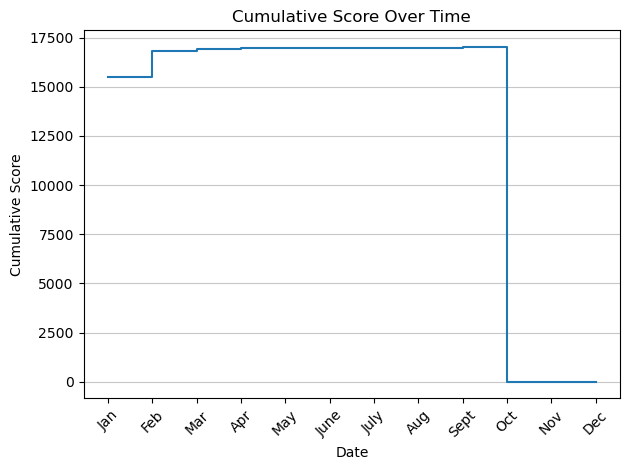

In [27]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept' ,'Oct', 'Nov', 'Dec']
plt.figure(figsize=(20, 8))
fig, axes = plt.subplots(1,1)
plt.step(months, res,where='post')# width=1, align='center')
plt.xlabel('Date')
plt.ylabel('Cumulative Score')
plt.title('Cumulative Score Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis='y', alpha=0.7)

In [16]:
story_df.tail(15)

,id,by,time,url,score,title,cumulative_score
1593,41234236,rbanffy,2024-08-13 11:59:58,https://www.theregister.com/2024/08/08/harvard...,2,"80 years ago, IBM gave Harvard one of the earl...",16979
1605,41236928,infodaemon,2024-08-13 17:26:28,https://dev.java/learn/jvm/tool/jwebserver/,2,JWebServer – A JDK Command Line HTTP Server fo...,16981
1631,41246097,zainalabdin878,2024-08-14 14:53:40,https://www.jornali.com,1,Jornali – A Memories App,16982
1356,41263555,eternal-io,2024-08-16 07:01:32,https://github.com/eternal-io/museair,1,MuseAir: New fastest portable hash with high q...,16983
1273,41301434,melenaboija,2024-08-20 17:22:06,https://www.nytimes.com/2024/08/20/travel/over...,2,Can Barcelona Survive Mass Tourism?,16985
1628,41394788,cnunciato,2024-08-29 21:08:27,https://www.pulumi.com/blog/any-terraform-prov...,3,Introducing: Support for Using Any Terraform P...,16988
1636,41396121,pauloxnet,2024-08-29 23:47:00,https://lp.jetbrains.com/python-developers-sur...,5,Python Developers Survey 2023 Results,16993
1307,41403906,kqr,2024-08-30 20:54:06,https://two-wrongs.com/bubble-sort-is-not-robu...,1,Bubble sort is not robust either,16994
1557,41523931,valevk,2024-09-12 19:24:31,https://www.princeton.edu/~kiyotaki/papers/Evi...,2,Evil is the root of all money (2001) [pdf],16996
1371,41566255,edweis,2024-09-17 11:39:01,https://github.com/phiresky/sqlite-zstd,5,SQLite Transparent Compression,17001
